# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Load Data

In [2]:
# Reading the data and understanding the data
df=pd.read_csv('webmd.csv')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


By looking at the head of the data we see that there are 12 features. 'Sides' or effectiveness can serve as our target variable. But it need some further processing as useful as a target variable.

In [3]:
 #check the shape of the given dataset
df.shape

(362806, 12)

Dataset has 362806 rows and 12 columns

In [4]:
#check the columns
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [5]:
#Check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [6]:
#Check the Description
df.describe(include='all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,362806,362806,362806,362806,362806.000000,362806.000000,362806.000000,362769,362806.000000,362806,362806,362806.000000
unique,12,1806,4524,7093,NaN,NaN,NaN,250167,NaN,3,1651,NaN
top,45-54,Other,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,,NaN
freq,80043,49765,404,4648,NaN,NaN,NaN,41824,NaN,238226,17460,NaN
mean,NaN,NaN,NaN,NaN,36879.370774,4.019829,3.532061,NaN,3.135408,NaN,NaN,6.744916
std,NaN,NaN,NaN,NaN,52624.412971,1.317711,1.455961,NaN,1.611106,NaN,NaN,9.324240
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,3.000000,3.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,9548.000000,5.000000,4.000000,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,63522.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


According to this dataset

    Most used drug is cymbalta, It will be intresting to see for what condition it is used.
    People of age between 45 to 54 used more drugs.
    Females are used more drugs.
    Most single day review came on 10/29/2007.



In [7]:
#check for the null values 
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Here have null values in Reviews column only

In [8]:
df.apply(lambda x: len(x.unique()))

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250168
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

check the unique values of each features

In [9]:
df["Sex"].value_counts() 

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

 In the 'Sex' column there are three unique values, one without name is found.ie. in 26537 rows sex column is blank

In [10]:
df['Sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Female    65.7%
Male      27.0%
           7.3%
Name: Sex, dtype: object

In [11]:
#Since the number of rows having blank cells in Sex Column is only 7.3%, it is filled with NaN
df['Sex'].replace(' ', np.nan, inplace=True)

In [12]:
df['Sex'].isnull().sum()

26537

In [13]:
#drop the null values in sex column
df.dropna(subset=['Sex'], inplace=True)

In [14]:
df["Sex"].value_counts()

Female    238226
Male       98043
Name: Sex, dtype: int64

In [15]:
# check for categorical attributes
cat_col = []
for x in df:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [16]:
df['Drug'].value_counts()

cymbalta                                                         4451
lisinopril solution                                              4022
lisinopril                                                       4022
lexapro                                                          3912
hydrocodone-acetaminophen                                        3661
                                                                 ... 
mucinex fast-max cold-sinus tablet                                  1
deplin-algal oil                                                    1
hydromorphone hcl-0.9% nacl patient controlled analgesia vial       1
oxacillin solution, piggyback premix frozen                         1
manganese sulfate powder                                            1
Name: Drug, Length: 6846, dtype: int64

cymbalta is the most reviewed drug

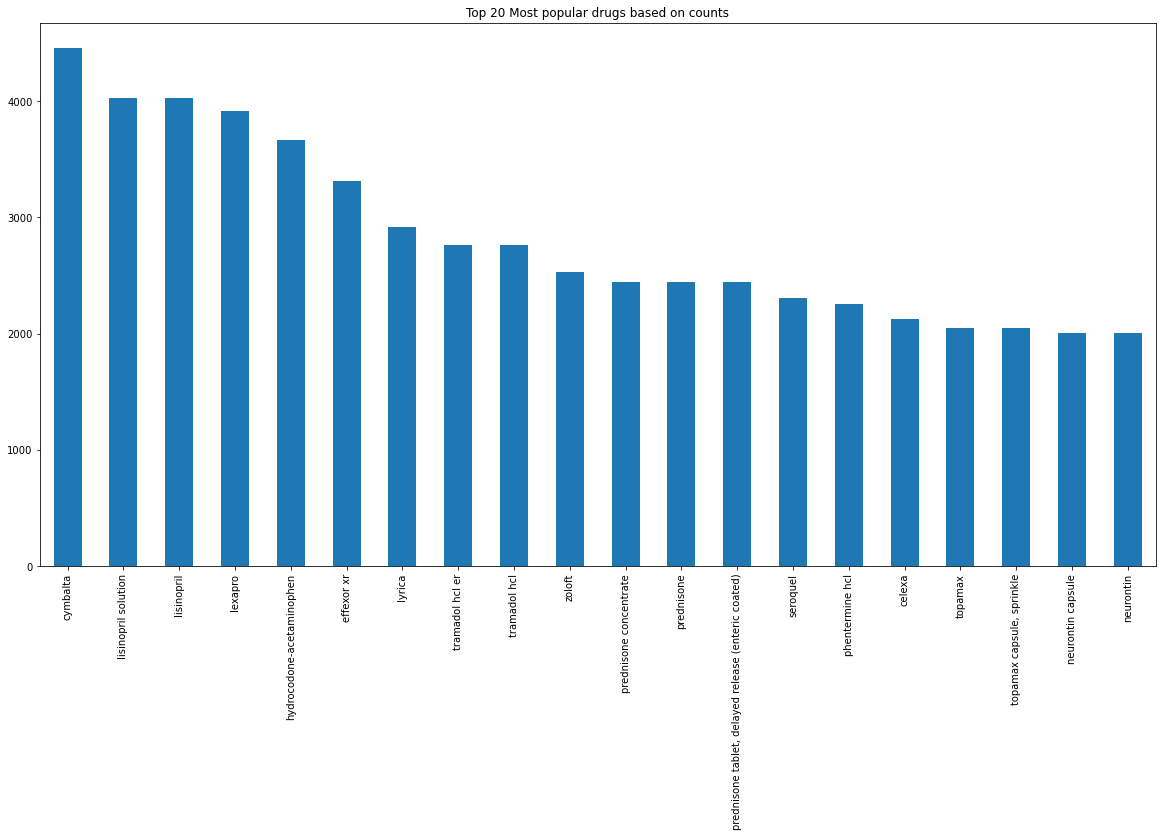

In [17]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(20,10))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

From the graph

    The top used drug is cymbalta.
    The top 4 drugs has count around 4000 and above.
    If we look at the top 20 most of the drugs counts are around 2000.

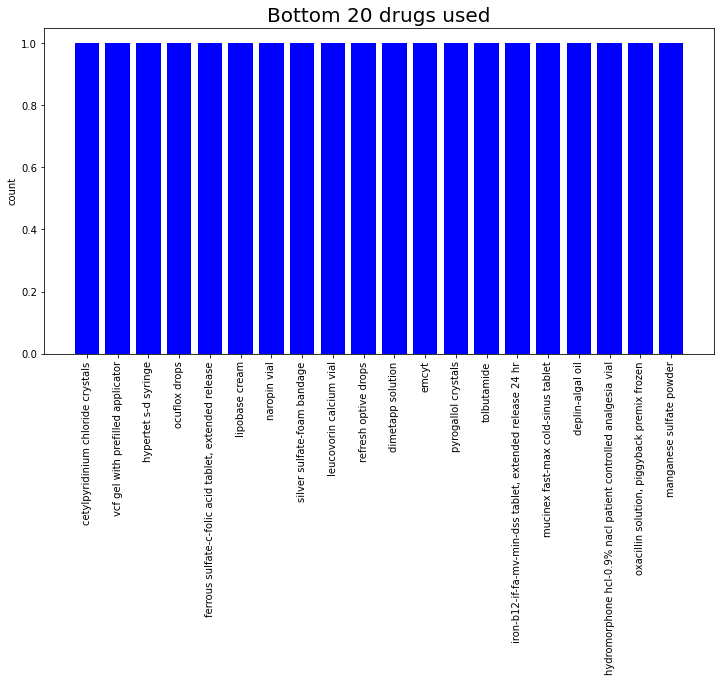

In [18]:
#plot a bargraph to check bottom 20 drugs used
plt.figure(figsize=(12,6))
drug_bottom=df['Drug'].value_counts(ascending = False).tail(20)

plt.bar(drug_bottom.index,drug_bottom.values,color='blue')
plt.title('Bottom 20 drugs used',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

From the above graph the each bottom 20 used drugs has count 1. These might be the drugs used of rare conditions or are new in market.

In [19]:
df['Effectiveness'].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
6         2
Name: Effectiveness, dtype: int64

In [20]:
#Checking effectiveness Distribution
eff_=df['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().\
rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
eff_['percent'] = 100 * (eff_['counts']/df.shape[0])
print(eff_)

   Effectiveness  counts    percent
0              5  120887  35.949493
1              4   76460  22.737749
2              3   56114  16.687236
3              1   54330  16.156708
4              2   28476   8.468220
5              6       2   0.000595


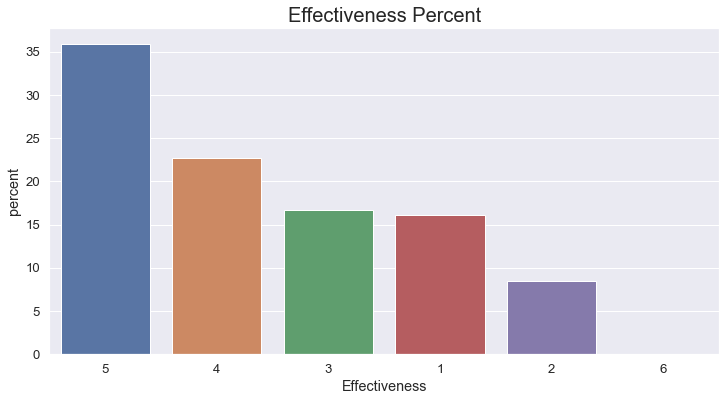

In [21]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
#let's plot and check
sns.barplot(x =eff_['Effectiveness'], y =eff_['percent'],order =eff_['Effectiveness'])
plt.title('Effectiveness Percent',fontsize=20)
plt.show()

Out of 10 the effectiveness of most of the drugs are 5 only. And others are below 5.

In [22]:
#"Effectiveness" column contains rating value from 1 to 5,Therefore values that indicates rating of 6 will be removed in order to get a clean Data Set
index_names = df[ df['Effectiveness'] == 6 ].index
df.drop(index_names, inplace = True)

In [23]:
df["Effectiveness"].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
Name: Effectiveness, dtype: int64

# Selection of Drug

We are selecting the dataset of drug named 'cymbalta' with DrugId =91491 .Because it is the most reviewed or used drug from the dataset.

In [24]:
df_cym=df.drop(df.loc[(df['Drug']!='cymbalta')].index)

In [25]:
df_cym.shape

(4451, 12)

In [26]:
df_cym.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314267,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5,4,I have only had one 30mg and so far i noticed ...,4,Female,"Nausea , dry mouth , constipation , loss of ...",0
314281,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2,1,,1,Male,"Nausea , dry mouth , constipation , loss of ...",2
314305,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5,4,The biggest problem was impotency from this pi...,4,Male,"Nausea , dry mouth , constipation , loss of ...",0


In [27]:
df_cym.Condition.nunique()

8

Cymbalta is used for the various conditions of patients.

In [28]:
df_cym['Condition'].value_counts()

Major Depressive Disorder                                    1855
Neuropathic Pain                                              670
Repeated Episodes of Anxiety                                  560
Other                                                         496
Disorder characterized by Stiff, Tender & Painful Muscles     398
Chronic Muscle or Bone Pain                                   387
Diabetic Complication causing Injury to some Body Nerves       49
Anxiousness associated with Depression                         36
Name: Condition, dtype: int64

In [29]:
df_cym.Sides.nunique()

1

Cymbalta has same side effects throughout the dataset

In [30]:
df_cym['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4451
Name: Sides, dtype: int64

In [31]:
df_cym['Satisfaction'].value_counts()

1    1433
5    1210
4     819
3     619
2     370
Name: Satisfaction, dtype: int64

In [32]:
df_cym['UsefulCount'].unique()

array([  0,   2,   1,  22,  12,   3,  30,  15,   4,   5,  28,  21,  25,
         7,  18,   9,  56,  29,   8,  23,   6,  19,  32,  24,  17,  13,
        14,  10,  11,  16,  20,  42, 103,  38,  26,  61, 145,  27,  43,
        39,  35,  33,  48,  36,  31,  93,  82,  58,  46,  47,  45,  44,
        34,  60,  50,  41, 116,  51,  40,  65,  97,  77, 129,  68,  59,
        37], dtype=int64)

In [33]:
#Since Reviews is having more than half of the values as unique we can neglect this column.
df_cym.drop("Reviews",axis=1,inplace=True)

In [34]:
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          33
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [35]:
df_copy=df_cym

# Finding Missing Values

In [36]:
df_cym["Age"].value_counts()

45-54         1264
55-64          961
35-44          860
25-34          580
65-74          381
19-24          222
75 or over      98
                51
13-18           32
0-2              1
7-12             1
Name: Age, dtype: int64

there is a blank space and the age group 3-6 is seem to be missing

In [37]:
#we can fill the blank space with a value 3-6
df_cym['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [38]:
df_cym['Age'].value_counts()

45-54         1264
55-64          961
35-44          860
25-34          580
65-74          381
19-24          222
75 or over      98
3-6             51
13-18           32
0-2              1
7-12             1
Name: Age, dtype: int64

# CORRELATION

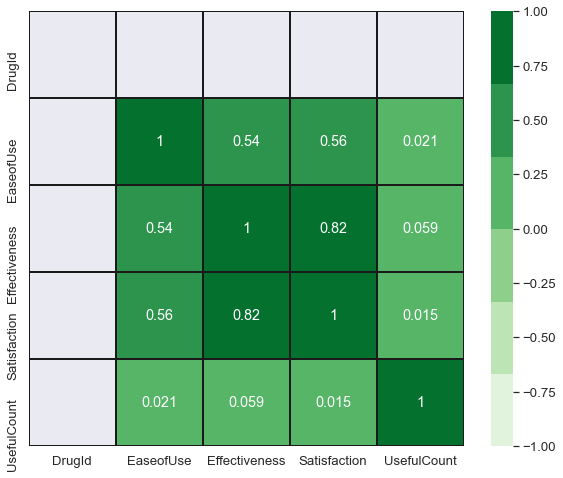

In [39]:
fig=plt.gcf()
fig.set_size_inches(10,8)
colormap=sns.color_palette('Greens')
fig=sns.heatmap(df_cym.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True,cmap=colormap)

Effectiveness and Satisfaction are highly correlated

# OUTLIERS DETECTION

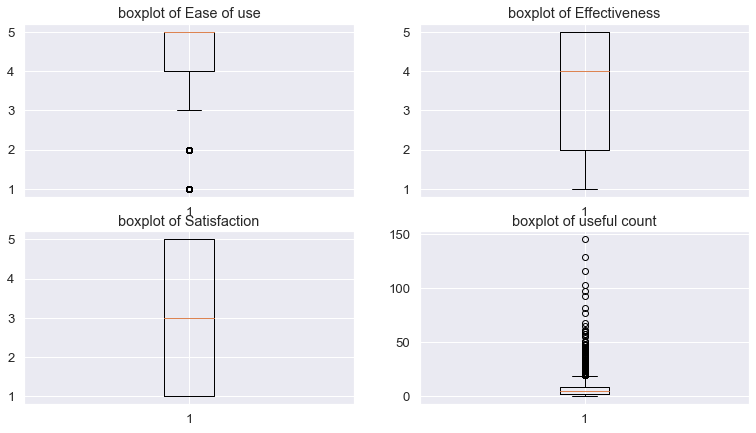

In [40]:
plt.figure(figsize=(13,7))

plt.subplot(2,2,1)
plt.boxplot(df_cym["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(df_cym["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(df_cym["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(df_cym["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()

Boxplot of useful count and ease of use shows that so many outliers are their and these values are more important for the further processing so moves to handle outliers.

In [41]:
Q1=np.percentile(df_cym["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(df_cym["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= -8.5
upperlimit =  19.5


In [42]:
outlier = []
for x in df_cym['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[22,
 30,
 28,
 21,
 25,
 56,
 29,
 23,
 29,
 21,
 32,
 24,
 22,
 21,
 25,
 21,
 25,
 32,
 22,
 30,
 20,
 42,
 30,
 22,
 103,
 38,
 28,
 30,
 26,
 61,
 25,
 26,
 28,
 145,
 27,
 29,
 43,
 39,
 30,
 22,
 21,
 35,
 33,
 48,
 36,
 56,
 27,
 38,
 21,
 24,
 30,
 22,
 22,
 21,
 31,
 21,
 21,
 25,
 93,
 24,
 31,
 35,
 82,
 20,
 33,
 25,
 58,
 20,
 46,
 21,
 47,
 45,
 44,
 34,
 60,
 48,
 26,
 29,
 50,
 36,
 20,
 25,
 47,
 20,
 20,
 23,
 41,
 26,
 21,
 22,
 25,
 21,
 23,
 22,
 28,
 22,
 21,
 28,
 20,
 42,
 27,
 20,
 28,
 22,
 26,
 25,
 29,
 23,
 26,
 116,
 21,
 51,
 40,
 29,
 20,
 28,
 28,
 25,
 21,
 34,
 31,
 30,
 23,
 20,
 20,
 26,
 35,
 29,
 65,
 24,
 22,
 30,
 20,
 26,
 34,
 20,
 21,
 46,
 23,
 20,
 23,
 27,
 27,
 35,
 25,
 20,
 21,
 21,
 28,
 97,
 23,
 23,
 22,
 33,
 56,
 45,
 22,
 39,
 21,
 23,
 41,
 77,
 31,
 129,
 24,
 22,
 20,
 31,
 24,
 34,
 22,
 20,
 21,
 23,
 24,
 21,
 22,
 22,
 21,
 20,
 29,
 22,
 22,
 23,
 20,
 22,
 22,
 28,
 24,
 20,
 20,
 22,
 24,
 20,
 21,
 22,
 32,
 21,
 20,
 

In [43]:
df_cym=df_cym.drop(df_cym.loc[df_cym["UsefulCount"]>upper].index)
df_cym=df_cym.drop(df_cym.loc[df_cym["UsefulCount"]<low].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2abe0760>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2abe0e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2abe0400>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2abed520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2abed880>],
 'means': []}

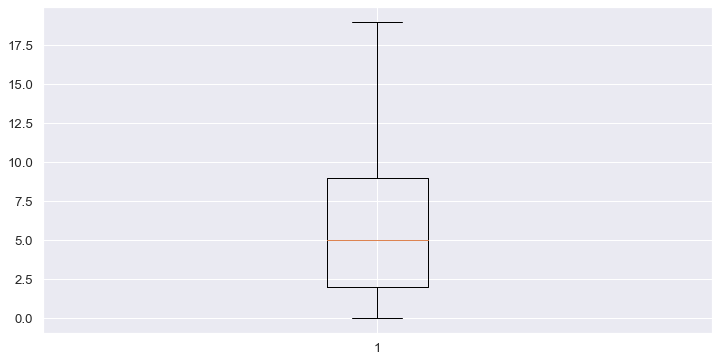

In [44]:
plt.boxplot(df_cym["UsefulCount"])

In [45]:
Q1=np.percentile(df_cym["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(df_cym["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= 2.5
upperlimit =  6.5


In [46]:
outlier = []
for x in df_cym['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,


In [47]:
df_cym=df_cym.drop(df_cym.loc[df_cym["EaseofUse"]<low].index)
df_cym=df_cym.drop(df_cym.loc[df_cym["EaseofUse"]>upper].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2ac9ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2acaa190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2ac9c730>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2acaa850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2acaabb0>],
 'means': []}

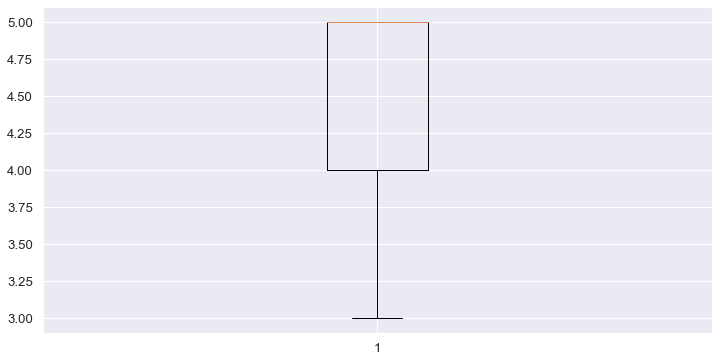

In [48]:
plt.boxplot(df_cym["EaseofUse"])

In [49]:
df_cym.shape

(3621, 11)

In [50]:
#adding index column
list2=list(range(3621))
df_cym=df_cym.set_index([list2])

In [51]:
df_cym.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
1,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
2,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0
3,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0
4,75 or over,Chronic Muscle or Bone Pain,8/13/2019,cymbalta,91491,5,5,5,Female,"Nausea , dry mouth , constipation , loss of ...",1


# Encoding

In [52]:
# On the basis of 'Satisfaction' let us recode the values of 'Effectiveness' to  categorical values ranging from 1 to 5.
df_cym['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
df_cym['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
df_cym['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
df_cym['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
df_cym['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [53]:
df_cym.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
1,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,moderate side effects,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
2,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5,mild side effects,4,Female,"Nausea , dry mouth , constipation , loss of ...",0
3,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5,mild side effects,4,Male,"Nausea , dry mouth , constipation , loss of ...",0
4,75 or over,Chronic Muscle or Bone Pain,8/13/2019,cymbalta,91491,5,no side effects,5,Female,"Nausea , dry mouth , constipation , loss of ...",1


# Visualizations

In [54]:
#check number of unique values in drug and condition
print(df['Drug'].nunique())
print(df['Condition'].nunique())

6846
1754


We can see that there are 7093 drugs and only 1806 conditions. So there are conditions which has multiple drugs

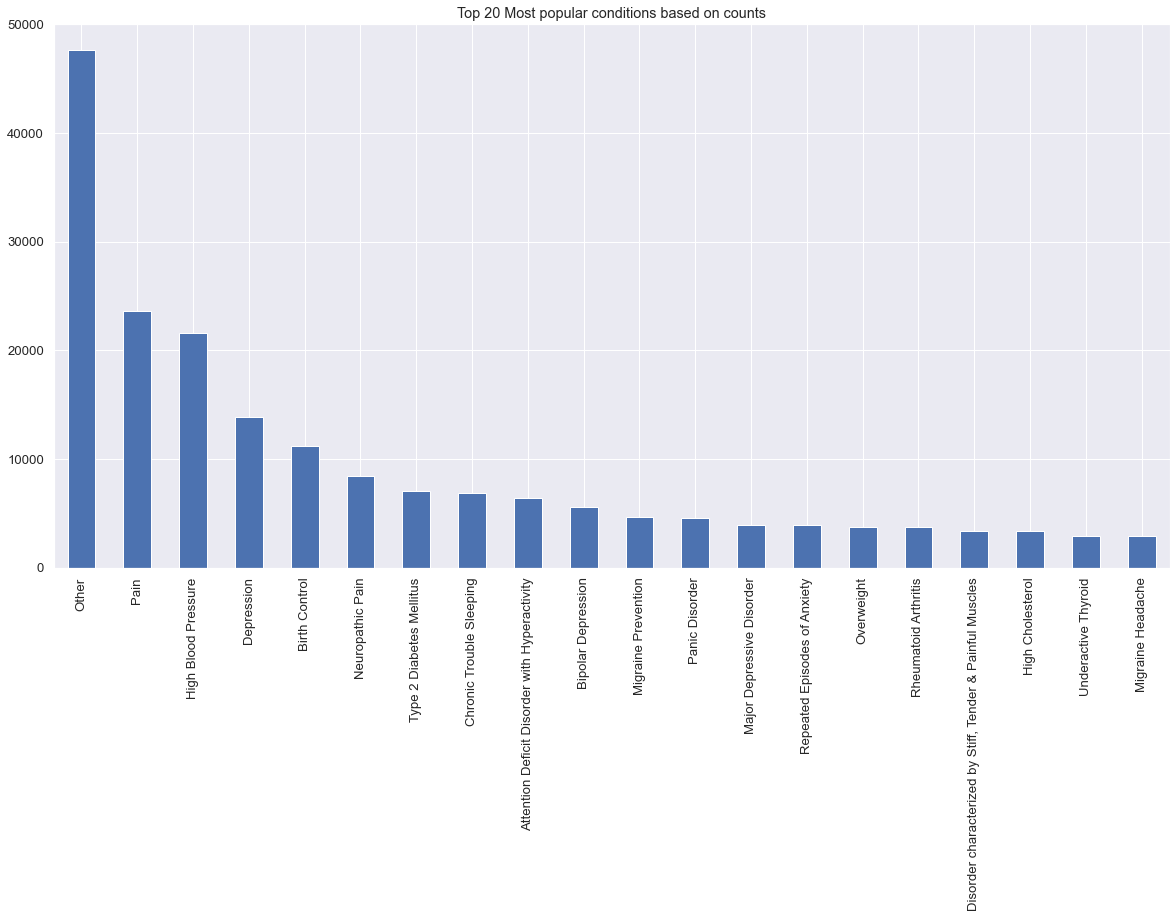

In [55]:
#plot a bargraph to check top 20 conditions
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

From the graph

    The top most condition is 'other' than listed conditions.
    The unlisted condition i.e, 'Other' comes around 50000 and above.
    other than top one condition pain and high blood pressure conditions uses more medicine.



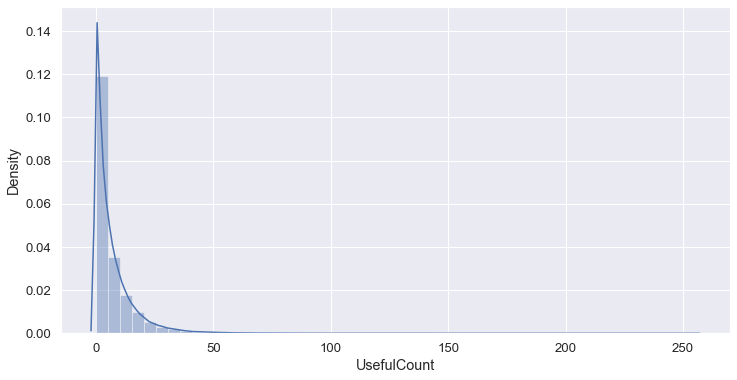

In [56]:
#plot a distribution plot of useful Count
sns.distplot(df['UsefulCount'])
plt.show()

From the above plot

    usefulCount is positively-skewed.
    Most of the usefulCounts are distributed between 0 and 50.
    There are extreme outliers present in our usefulCounts

In [57]:
#check the number of drugs per conditions
df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4324
Osteoporosis                                   228
Birth Control                                  201
High Blood Pressure                            199
Pain                                           198
Acne                                           185
Painful Periods                                156
Rheumatoid Arthritis                           144
Cough                                          131
Cold Symptoms                                  120
Inflammation of the Nose due to an Allergy     117
Type 2 Diabetes Mellitus                       113
Abnormally Long or Heavy Periods               110
Stuffy Nose                                    105
Incomplete or Infrequent Bowel Movements       105
Disease of Ovaries with Cysts                  102
Allergic Conjunctivitis                         95
Migraine Headache                               94
"Change of Life" Signs                          91
Atopic Dermatitis    

It might be possible that the user didn't mentioned his/her condition as sometimes people doesn't want to reveal thier disorders. We can look up the drug names and fill up the conditions for which that drug is used

In [58]:
#check the percentage of 'other' conditions
other_con =df[df['Condition'] == 'Other']
print('Number of other conditions : ', len(other_con))
percent_other_con = 100 * len(other_con)/df.shape[0]
print('Total percent of noisy data {} %  '.format(percent_other_con))

Number of other conditions :  47662
Total percent of noisy data 14.17385589427449 %  


There are 47662 unique drugs for conditions mentioned as 'other'.Here present 14% of noisy data. we can drop it

In [59]:
# drop noisy data
df.drop(other_con.index, axis = 0, inplace=True)

In [60]:
#check if a single drug is used for multiple conditions
drug_multiple_cond =df.groupby('Drug')['Condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

Drug
prednisone tablet, delayed release (enteric coated)                                89
prednisone                                                                         89
prednisone concentrate                                                             89
cipro                                                                              56
cipro suspension, microcapsule reconstituted                                       56
methylprednisolone                                                                 49
ciprofloxacin                                                                      45
levaquin                                                                           44
kenalog-40 vial                                                                    42
doxycycline hyclate tablet, delayed release (enteric coated) antimalarial drugs    39
Name: Condition, dtype: int64


There are many drugs which can be used for multiple conditions.

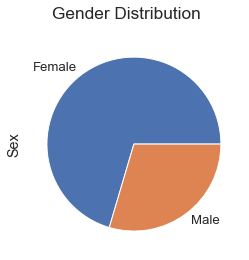

In [61]:
#gender distribution
data1 = df['Sex'].tolist()
male=data1.count('Male')
female=data1.count('Female')
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")

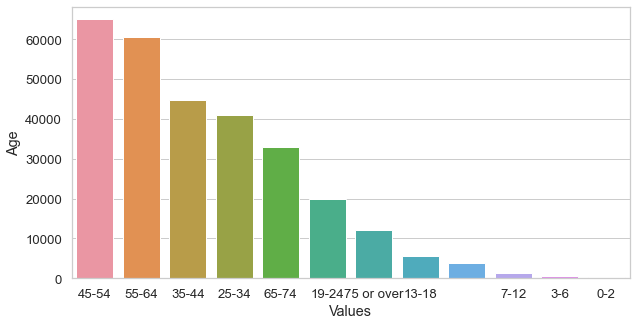

In [62]:
#age distribution
ageColourful = df['Age'].value_counts().reset_index()
ageColourful.columns = ["Values", "Age"]
ageColourful
# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y ='Age', data = ageColourful);
plt.show();

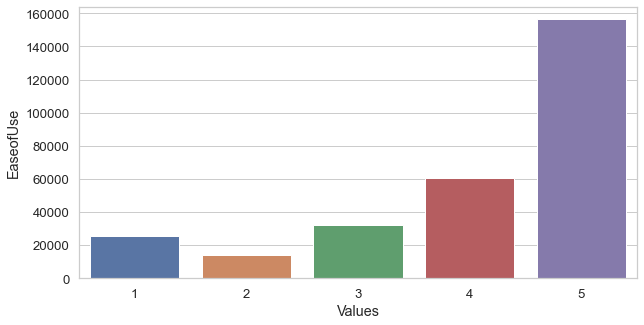

In [63]:
#ease of use distribution
easeOfUseRatingColourful = df['EaseofUse'].value_counts().reset_index()
easeOfUseRatingColourful.columns = ["Values", "EaseofUse"]
easeOfUseRatingColourful
# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y = "EaseofUse", data = easeOfUseRatingColourful);

<Figure size 720x1080 with 0 Axes>

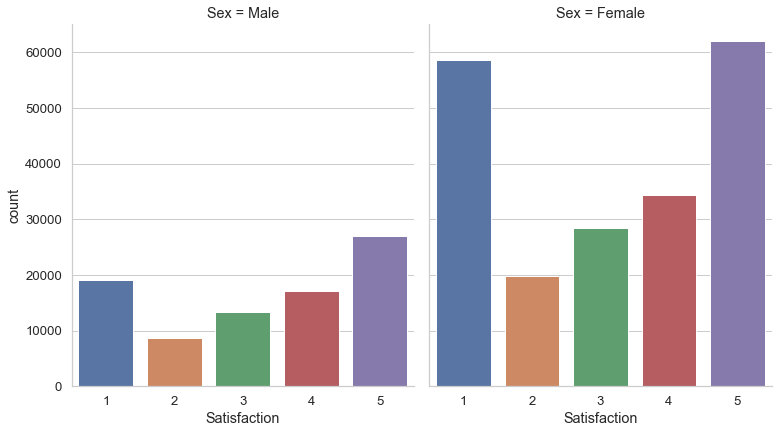

In [64]:
# Catplot of Satisfaction with respect to Sex
plt.figure(figsize=(10,15))
g = sns.catplot(x="Satisfaction",col="Sex",
                data=df, kind="count",
                height=6,aspect =.9);

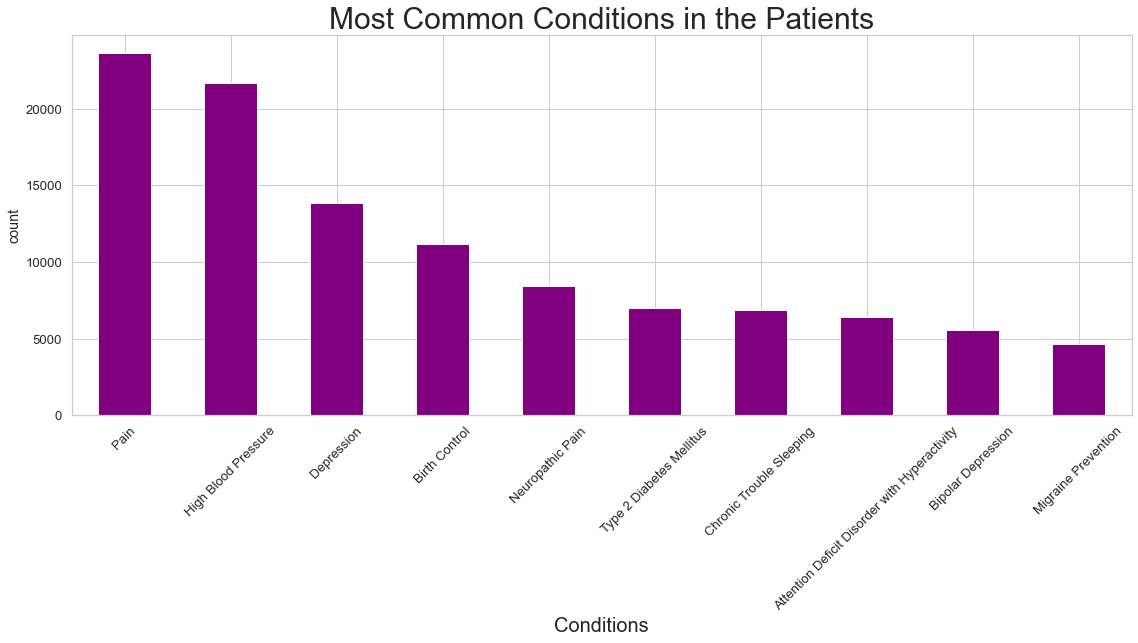

In [65]:
# checking the different types of conditions in patients
df['Condition'].value_counts().head(10).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.xticks(rotation=45);
plt.show()

# Effect of drug on age group 45-54 (which is mostly affected among the age group)

Feature engineering

In [66]:
dt=df_cym.loc[(df_cym['Age']=="45-54")]

In [67]:
# let's make a new column review sentiment 
df_cym.loc[(df_cym['Satisfaction'] >= 5), 'Review_Sentiment'] = 1
df_cym.loc[(df_cym['Satisfaction'] <5), 'Review_Sentiment'] = 0

df_cym['Review_Sentiment'].value_counts()

0.0    2505
1.0    1116
Name: Review_Sentiment, dtype: int64

In [68]:
df_cym=df_cym.drop(['Date','Drug','DrugId','Sides'],axis=1)

In [69]:
df_cym.shape

(3621, 8)

# Label encoding

In [70]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    df_cym[col]=label.fit_transform(df_cym[col])
    
datastand=df_cym

In [71]:
df_cym.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,6,7,3,extreme severe side effects,1,1,0,0.0
1,5,0,3,moderate side effects,2,0,0,0.0
2,6,1,5,mild side effects,4,0,0,0.0
3,7,1,5,mild side effects,4,1,0,0.0
4,9,1,5,no side effects,5,0,1,1.0


# Data splitting

In [72]:
y=df_cym['Effectiveness']
x=df_cym.drop(['Effectiveness'],axis=1)
ycopy=df_copy['Effectiveness']
xcopy=df_copy.drop(['Effectiveness'],axis=1)

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
xcopy_train,xcopy_test,ycopy_train,ycopy_test=train_test_split(xcopy,ycopy,random_state=42,test_size=0.1)

# Model Selection

In [74]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.55      0.98      0.71        47
          mild side effects       0.60      0.64      0.62       102
      moderate side effects       0.54      0.48      0.51        71
            no side effects       0.81      0.74      0.77       118
        severe side effects       0.00      0.00      0.00        25

                   accuracy                           0.64       363
                  macro avg       0.50      0.57      0.52       363
               weighted avg       0.61      0.64      0.61       363

[[46  1  0  0  0]
 [ 8 65 13 16  0]
 [12 21 34  4  0]
 [ 7 21  3 87  0]
 [10  1 13  1  0]]
accuracy is 0.6391184573002755


# KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
# Finding best k value
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [77]:
acc_values

[0.5922865013774105,
 0.5702479338842975,
 0.5950413223140496,
 0.6115702479338843,
 0.6060606060606061,
 0.6225895316804407,
 0.6225895316804407,
 0.6170798898071626,
 0.6115702479338843,
 0.6033057851239669,
 0.6198347107438017,
 0.6170798898071626]

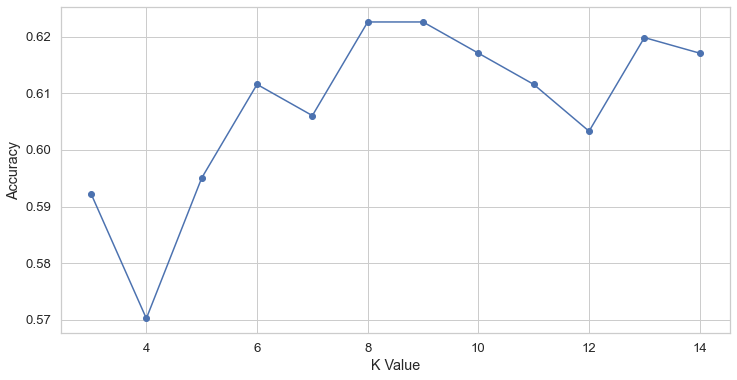

In [78]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [79]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.53      0.89      0.67        47
          mild side effects       0.59      0.66      0.62       102
      moderate side effects       0.49      0.41      0.45        71
            no side effects       0.80      0.73      0.76       118
        severe side effects       0.40      0.08      0.13        25

                   accuracy                           0.62       363
                  macro avg       0.56      0.55      0.53       363
               weighted avg       0.62      0.62      0.61       363

[[42  1  2  0  2]
 [ 6 67 12 17  0]
 [12 26 29  3  1]
 [ 8 18  6 86  0]
 [11  1 10  1  2]]
accuracy is 0.6225895316804407


# GradientBoostingClassifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.55      0.96      0.70        47
          mild side effects       0.66      0.60      0.63       102
      moderate side effects       0.51      0.55      0.53        71
            no side effects       0.80      0.72      0.76       118
        severe side effects       0.00      0.00      0.00        25

                   accuracy                           0.63       363
                  macro avg       0.50      0.57      0.52       363
               weighted avg       0.62      0.63      0.62       363

[[45  0  1  0  1]
 [ 8 61 16 16  1]
 [12 13 39  4  3]
 [ 7 18  7 85  1]
 [10  1 13  1  0]]
accuracy is 0.6336088154269972


# Bernoulli Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                             precision    recall  f1-score   support

extreme severe side effects       0.55      0.98      0.70        47
          mild side effects       0.71      0.36      0.48       102
      moderate side effects       0.41      0.66      0.51        71
            no side effects       0.82      0.75      0.78       118
        severe side effects       0.20      0.04      0.07        25

                   accuracy                           0.60       363
                  macro avg       0.54      0.56      0.51       363
               weighted avg       0.63      0.60      0.58       363

[[46  0  1  0  0]
 [ 8 37 42 14  1]
 [13  5 47  4  2]
 [ 7 10 12 88  1]
 [10  0 13  1  1]]


# RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.52      0.70      0.60        47
          mild side effects       0.56      0.54      0.55       102
      moderate side effects       0.46      0.52      0.49        71
            no side effects       0.74      0.66      0.70       118
        severe side effects       0.19      0.12      0.15        25

                   accuracy                           0.57       363
                  macro avg       0.49      0.51      0.50       363
               weighted avg       0.57      0.57      0.56       363

[[33  2  9  0  3]
 [ 7 55 16 21  3]
 [11 16 37  4  3]
 [ 4 25  7 78  4]
 [ 8  0 11  3  3]]
accuracy is 0.5674931129476584


In [85]:
# Fine tuning of parametres
rf_ft=RandomForestClassifier(max_depth=100,n_estimators=100)
rf_ft.fit(x_train,y_train)
y_rf_ft=rf_ft.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rf_ft))
print("confusion matrix is",confusion_matrix(y_test,y_rf_ft))

accuracy is 0.5757575757575758
confusion matrix is [[31  4 11  0  1]
 [ 7 54 15 23  3]
 [ 9 17 37  4  4]
 [ 4 23  8 82  1]
 [ 9  0 10  1  5]]


only a bit change in the accuracy

# DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is ',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.53      0.57      0.55        47
          mild side effects       0.48      0.55      0.51       102
      moderate side effects       0.42      0.42      0.42        71
            no side effects       0.68      0.58      0.63       118
        severe side effects       0.09      0.08      0.09        25

                   accuracy                           0.51       363
                  macro avg       0.44      0.44      0.44       363
               weighted avg       0.51      0.51      0.51       363

[[27  7  7  0  6]
 [ 4 56 15 23  4]
 [ 9 20 30  6  6]
 [ 4 32  9 69  4]
 [ 7  2 11  3  2]]
Accuracy is  0.5068870523415978


# SVC

In [87]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)

# Summary of the predictions made by the classifier

y_pred=svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.55      0.98      0.70        47
          mild side effects       0.67      0.63      0.65       102
      moderate side effects       0.54      0.58      0.56        71
            no side effects       0.81      0.74      0.77       118
        severe side effects       0.00      0.00      0.00        25

                   accuracy                           0.66       363
                  macro avg       0.51      0.58      0.54       363
               weighted avg       0.63      0.66      0.63       363

[[46  0  1  0  0]
 [ 8 64 14 16  0]
 [13 13 41  4  0]
 [ 7 18  6 87  0]
 [10  0 14  1  0]]
accuracy is 0.6556473829201102


# Ensemble Learning

In [88]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()
gb_clf=GradientBoostingClassifier()
gnb_clf=GaussianNB()
dt_clf=DecisionTreeClassifier()
svc_clf=SVC()
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')

In [89]:
voting_clf = voting.fit(x_train, y_train)

In [90]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, gb_clf,gnb_clf,dt_clf,svc_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6115702479338843
RandomForestClassifier 0.5482093663911846
KNeighborsClassifier 0.5950413223140496
GradientBoostingClassifier 0.6336088154269972
GaussianNB 0.6033057851239669
DecisionTreeClassifier 0.509641873278237
SVC 0.6556473829201102
VotingClassifier 0.6556473829201102


In [91]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.595041
1   LR  0.639118
2   DT  0.498623
3   RF  0.564738
4   GB  0.633609
5  GNB  0.603306
6  SVC  0.655647
7   EL  0.652893


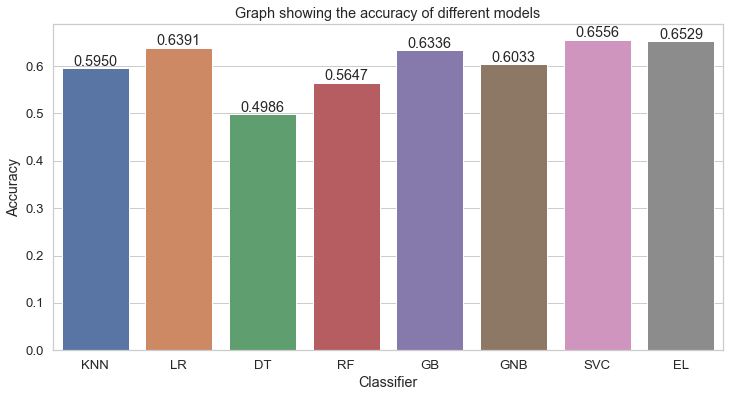

In [92]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Graph showing the accuracy of different models')    
plt.show()

Inference: Comparing different models, SVC shows highest accuracy and seem to be the best of all models

# Prediction using SVC

In [93]:
y_pred=svc.predict(x_test)
print("Side effect:")
print(y_test.values)

Side effect:
['extreme severe side effects' 'no side effects' 'moderate side effects'
 'no side effects' 'mild side effects' 'no side effects' 'no side effects'
 'mild side effects' 'mild side effects' 'mild side effects'
 'severe side effects' 'no side effects' 'severe side effects'
 'mild side effects' 'extreme severe side effects' 'mild side effects'
 'moderate side effects' 'no side effects' 'mild side effects'
 'moderate side effects' 'mild side effects' 'mild side effects'
 'mild side effects' 'severe side effects' 'mild side effects'
 'moderate side effects' 'moderate side effects' 'mild side effects'
 'no side effects' 'extreme severe side effects' 'no side effects'
 'extreme severe side effects' 'no side effects' 'severe side effects'
 'moderate side effects' 'severe side effects' 'no side effects'
 'extreme severe side effects' 'no side effects' 'moderate side effects'
 'moderate side effects' 'extreme severe side effects'
 'moderate side effects' 'no side effects' 'no side e